In [1]:
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import torch

from qbo1d import adsolver, utils
from qbo1d.stochastic_forcing import WaveSpectrum

%load_ext autoreload
%autoreload 2

In [2]:
def ax_pos_inch_to_absolute(fig_size, ax_pos_inch):
    ax_pos_absolute = []
    ax_pos_absolute.append(ax_pos_inch[0]/fig_size[0])
    ax_pos_absolute.append(ax_pos_inch[1]/fig_size[1])
    ax_pos_absolute.append(ax_pos_inch[2]/fig_size[0])
    ax_pos_absolute.append(ax_pos_inch[3]/fig_size[1])
    
    return ax_pos_absolute

In [3]:
# In some cases I found it necessary to use double precision
torch.set_default_dtype(torch.float64)

# Demonstration

In [4]:
# instantiating a solver using the default values, except for t_max which is set up for a 96 year long run
solver = adsolver.ADSolver(t_max=360*96*86400, w=3e-4)
model = WaveSpectrum(solver)

### The following cell runs the solver -- takes about 20 sec for 96 years.

In [5]:
u = solver.solve(source_func=model)

In [6]:
# estimating QBO amplitudes and period
spinup_time = 12*360*86400

amp25 = utils.estimate_amplitude(solver.time, solver.z, u, height=25e3, spinup=spinup_time)
amp20 = utils.estimate_amplitude(solver.time, solver.z, u, height=20e3, spinup=spinup_time)
tau25 = utils.estimate_period(solver.time, solver.z, u, height=25e3, spinup=spinup_time)

### Plotting the solution

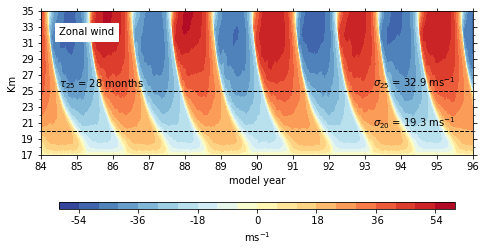

In [7]:
fig_size = (06.90, 02.20+01.50)
fig = plt.figure(figsize=fig_size)

ax = []

ax.append(fig.add_axes(ax_pos_inch_to_absolute(fig_size, [00.75, 01.25, 06.00, 02.00])))

cmin = -np.max(np.abs(u.numpy()))
cmax = np.max(np.abs(u.numpy()))

xmin = 84.
xmax = 96.
ymin = 17.
ymax = 35.

ax[0].set_xlim(left=84.)
ax[0].set_xlim(right=96.)
ax[0].set_ylim(bottom=17.)
ax[0].set_ylim(top=35.)

h = []
    
h.append(ax[0].contourf(solver.time/86400/360, solver.z[:]/1000, u.numpy().T,
                           21, cmap="RdYlBu_r", vmin=cmin, vmax=cmax))

ax[0].axhline(25., xmin=0, xmax=1, color='black', linestyle='dashed', linewidth=1.)
ax[0].axhline(20., xmin=0, xmax=1, color='black', linestyle='dashed', linewidth=1.)

ax[0].set_ylabel('Km', fontsize=10)

ax[0].set_xlabel('model year', fontsize=10)

xticks_list = np.arange(xmin, xmax+1, 1)
ax[0].set_xticks(xticks_list)

yticks_list = np.arange(ymin, ymax+2, 2)
ax[0].set_yticks(yticks_list)

xticklabels_list = list(xticks_list)
xticklabels_list = [ '%.0f' % elem for elem in xticklabels_list ]
ax[0].set_xticklabels(xticklabels_list, fontsize=10)

ax[0].xaxis.set_minor_locator(MultipleLocator(1.))
ax[0].yaxis.set_minor_locator(MultipleLocator(1.))

ax[0].tick_params(which='both', left=True, right=True, bottom=True, top=True)
ax[0].tick_params(which='both', labelbottom=True)

ax[0].text(84.50, 33, 'Zonal wind', backgroundcolor='white',
              horizontalalignment='left', verticalalignment='top', color='black')

ax[0].text(95.50, 25, r'$\sigma_{25}$ = ' '%.1f' %amp25 + r' $\mathrm{m s^{-1}}$',
              horizontalalignment='right', verticalalignment='bottom', color='black')

ax[0].text(95.50, 20, r'$\sigma_{20}$ = ' '%.1f' %amp20 + r' $\mathrm{m s^{-1}}$',
              horizontalalignment='right', verticalalignment='bottom', color='black')

ax[0].text(84.50, 25, r'$\tau_{25}$ = ' '%.0f' %tau25 + ' months',
              horizontalalignment='left', verticalalignment='bottom', color='black')

# # colorbars
cbar_ax0 = fig.add_axes(ax_pos_inch_to_absolute(fig_size, [01.00, 00.50, 05.50, 00.10])) 
ax[0].figure.colorbar(plt.cm.ScalarMappable(cmap="RdYlBu_r"), cax=cbar_ax0, format='% 2.0f', 
                      boundaries=np.linspace(cmin, cmax, 21), orientation='horizontal',
                      label=r'$\mathrm{m s^{-1}}$')


# Plotting the drags and shears

Next we plot the drags and shears to demonstrate that they are proportional. Note that the model instance keeps track of the drags during computation, so we only need to evaluate the shears.

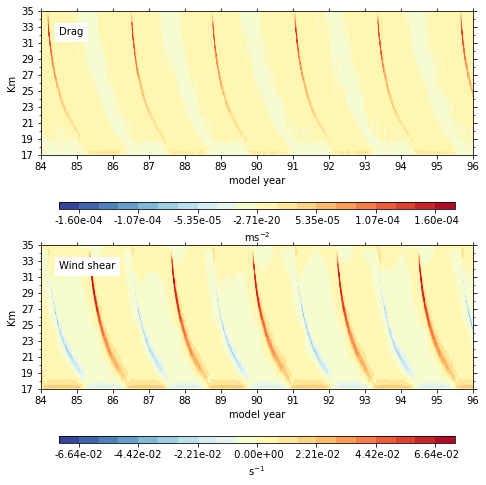

In [8]:
fig_size = (06.90, 07.00)
fig = plt.figure(figsize=fig_size)

ax = []

ax.append(fig.add_axes(ax_pos_inch_to_absolute(fig_size, [00.75, 04.50, 06.00, 02.00])))
ax.append(fig.add_axes(ax_pos_inch_to_absolute(fig_size, [00.75, 01.25, 06.00, 02.00])))

cmin = -np.max(np.abs(model.s.numpy()))
cmax = np.max(np.abs(model.s.numpy()))

xmin = 84.
xmax = 96.
ymin = 17.
ymax = 35.

ax[0].set_xlim(left=84.)
ax[0].set_xlim(right=96.)
ax[0].set_ylim(bottom=17.)
ax[0].set_ylim(top=35.)

h = []
    
h.append(ax[0].contourf(solver.time/86400/360, solver.z/1000, model.s.numpy().T,
                           21, cmap="RdYlBu_r", vmin=cmin, vmax=cmax))

ax[0].set_ylabel('Km', fontsize=10)

ax[0].set_xlabel('model year', fontsize=10)

xticks_list = np.arange(xmin, xmax+1, 1)
ax[0].set_xticks(xticks_list)

yticks_list = np.arange(ymin, ymax+2, 2)
ax[0].set_yticks(yticks_list)

xticklabels_list = list(xticks_list)
xticklabels_list = [ '%.0f' % elem for elem in xticklabels_list ]
ax[0].set_xticklabels(xticklabels_list, fontsize=10)

ax[0].xaxis.set_minor_locator(MultipleLocator(1.))
ax[0].yaxis.set_minor_locator(MultipleLocator(1.))

ax[0].tick_params(which='both', left=True, right=True, bottom=True, top=True)
ax[0].tick_params(which='both', labelbottom=True)

ax[0].text(84.50, 33, 'Drag', backgroundcolor='white',
              horizontalalignment='left', verticalalignment='top', color='black')

# # colorbars
cbar_ax0 = fig.add_axes(ax_pos_inch_to_absolute(fig_size, [01.00, 03.75, 05.50, 00.10])) 
ax[0].figure.colorbar(plt.cm.ScalarMappable(cmap="RdYlBu_r"), cax=cbar_ax0, format='% 0.2e', 
                      boundaries=np.linspace(cmin, cmax, 21), orientation='horizontal',
                      label=r'$\mathrm{m s^{-2}}$')


cmin = -np.max(np.abs(torch.matmul(solver.D1, u.T).numpy()))
cmax = np.max(np.abs(torch.matmul(solver.D1, u.T).numpy()))

ax[1].set_xlim(left=84.)
ax[1].set_xlim(right=96.)
ax[1].set_ylim(bottom=17.)
ax[1].set_ylim(top=35.)

h = []
    
h.append(ax[1].contourf(solver.time/86400/360, solver.z/1000, torch.matmul(solver.D1, u.T).numpy(),
                           21, cmap="RdYlBu_r", vmin=cmin, vmax=cmax))

ax[1].set_ylabel('Km', fontsize=10)

ax[1].set_xlabel('model year', fontsize=10)

xticks_list = np.arange(xmin, xmax+1, 1)
ax[1].set_xticks(xticks_list)

yticks_list = np.arange(ymin, ymax+2, 2)
ax[1].set_yticks(yticks_list)

xticklabels_list = list(xticks_list)
xticklabels_list = [ '%.0f' % elem for elem in xticklabels_list ]
ax[1].set_xticklabels(xticklabels_list, fontsize=10)

ax[1].xaxis.set_minor_locator(MultipleLocator(1.))
ax[1].yaxis.set_minor_locator(MultipleLocator(1.))

ax[1].tick_params(which='both', left=True, right=True, bottom=True, top=True)
ax[1].tick_params(which='both', labelbottom=True)

ax[1].text(84.50, 33, 'Wind shear', backgroundcolor='white',
              horizontalalignment='left', verticalalignment='top', color='black')

# # colorbars
cbar_ax0 = fig.add_axes(ax_pos_inch_to_absolute(fig_size, [01.00, 00.50, 05.50, 00.10])) 
ax[1].figure.colorbar(plt.cm.ScalarMappable(cmap="RdYlBu_r"), cax=cbar_ax0, format='% 0.2e', 
                      boundaries=np.linspace(cmin, cmax, 21), orientation='horizontal',
                      label=r'$\mathrm{s^{-1}}$')


Note, the differentiation matrix used in the numerical scheme zeros-out the first and last elements which zeros-out the shears at the top and bottom. 